# Advanced Pairs Trading : Kalman Filters

## Import library

In [54]:
import sys
sys.path.append('../../')

In [55]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [56]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [57]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [58]:
Currency_Pair = 'AUDUSD'

## TF D1

In [59]:
TF = 'D1'

In [60]:
data_1 = XAUUSD[TF]

In [61]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

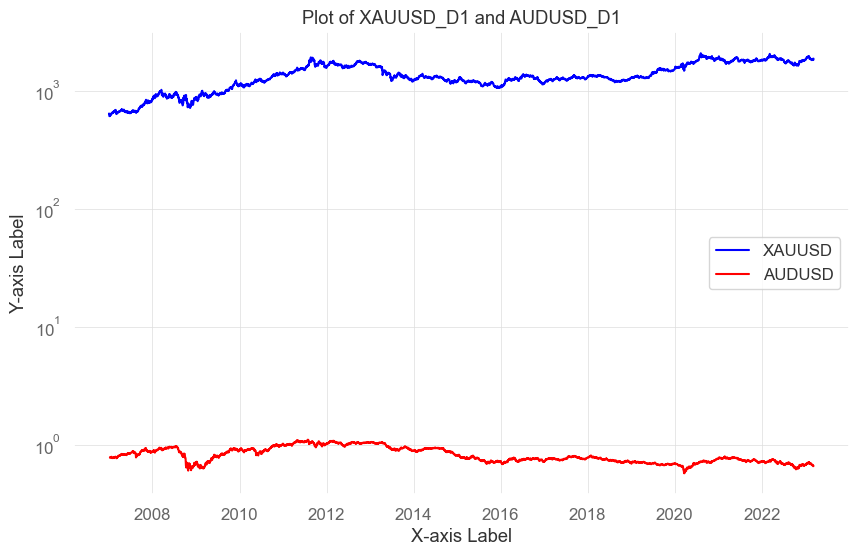

In [62]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [63]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [64]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          6.014e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:49:54   Log-Likelihood:                         -36850.
No. Observations:                4999   AIC:                                  7.370e+04
Df Residuals:                    4998   BIC:                                  7.371e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1603.5812      6.539    245.235      0.000    1590.762    1616.400
==============================================================================
Omnibus:                      179.893   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.424
Skew:                           0.336   Prob(JB):                     4.35e-32
Kurtosis:                       2.509   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
result = KF.Run()

In [66]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.900546
Multiple (Buy-and-Hold):     3.70236
--------------------------------------
Out-/Underperformance:       -2.801814


CAGR:                        -0.00653
Annualized Mean:             -0.006552
Annualized Std:              0.025395
Sharpe Ratio:                -0.257984
Sortino Ratio:               -0.348917
Maximum Drawdown:            0.149156
Calmar Ratio:                -0.043781
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -9.66849


### Save Result Backtest 

In [67]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [68]:
filename = f'{Currency_Pair}_{TF}.csv'

In [69]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.41%
CAGR﹪                     -0.47%

Sharpe                     -0.23
Prob. Sharpe Ratio         15.0%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -15.12%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -0.67
Kurtosis                   8.54

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.64%
Kelly Criterion            -2.22%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-15.115159,-14.725024
2,2007-03-14,2007-04-20,2007-06-25,104,-0.487756,-0.487494
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046170,-0.020938


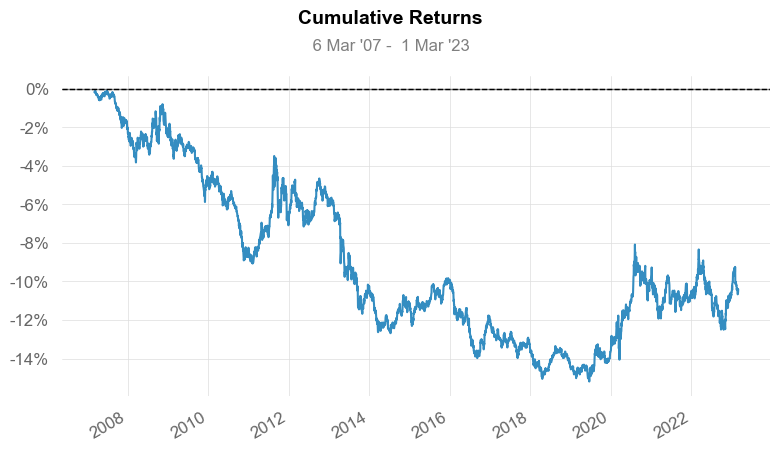

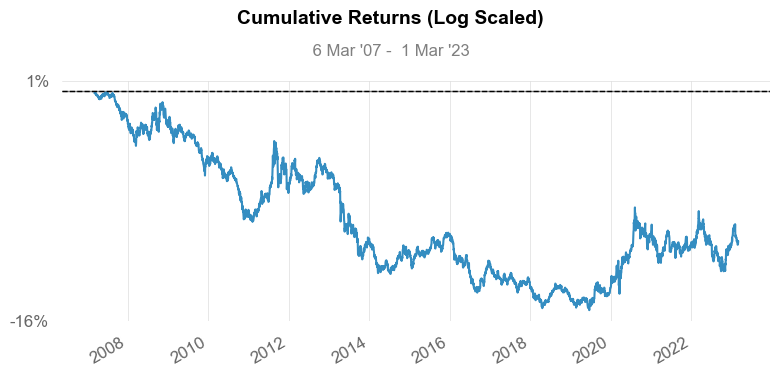

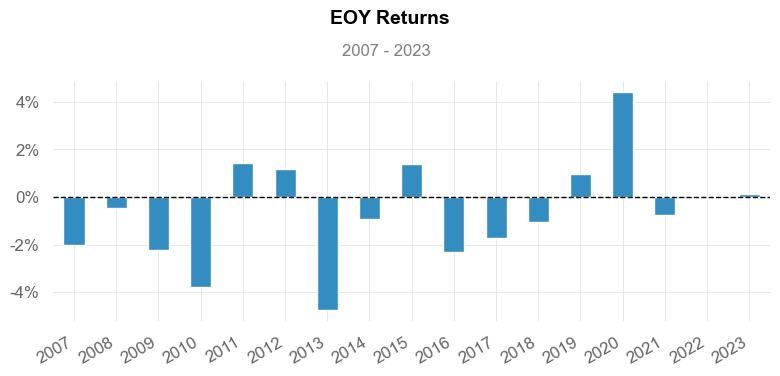

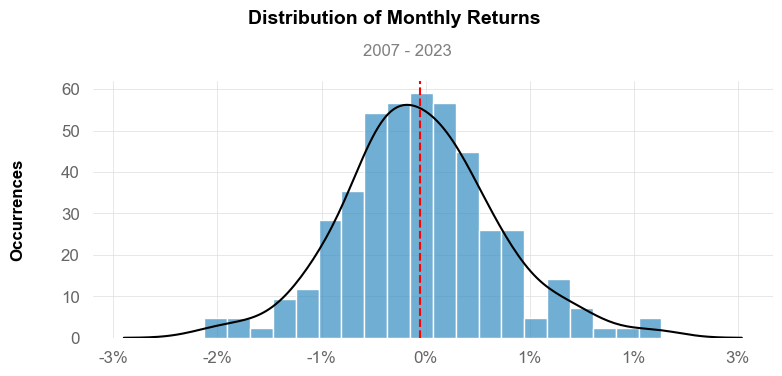

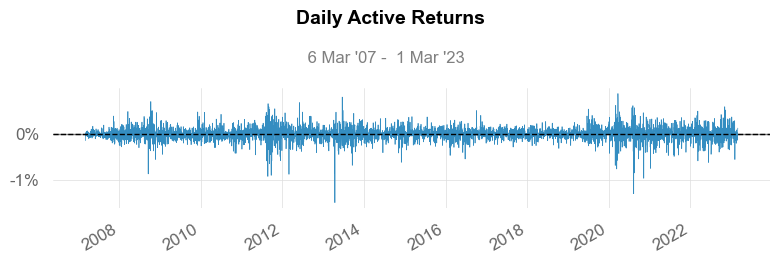

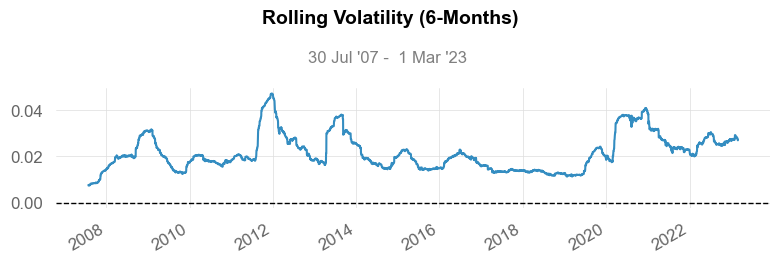

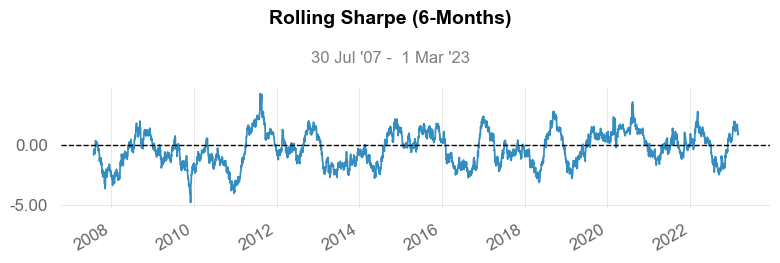

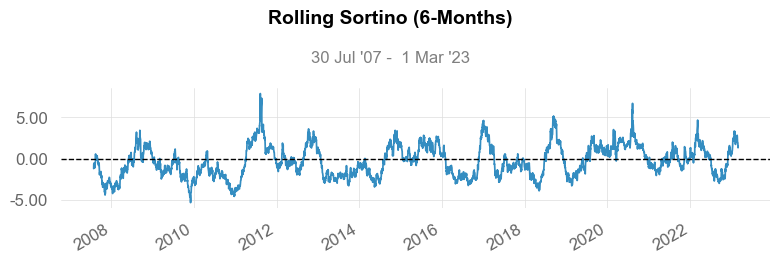

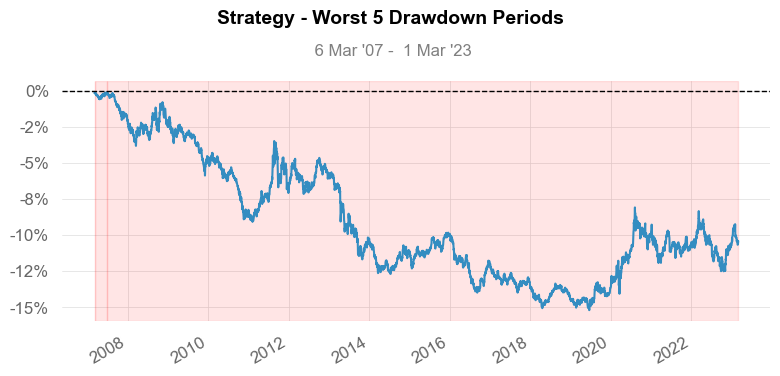

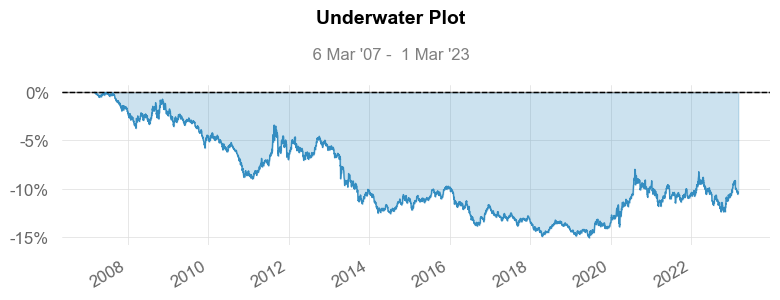

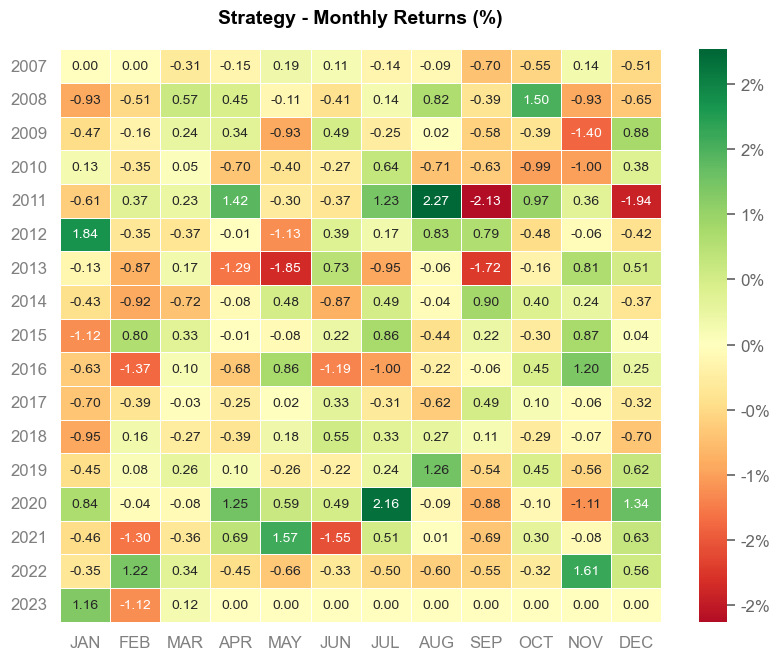

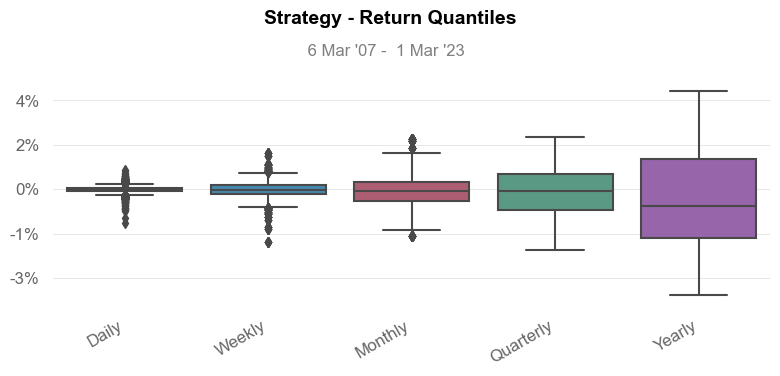

In [70]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [71]:
TF = 'H4'

In [72]:
data_1 = XAUUSD[TF]

In [73]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

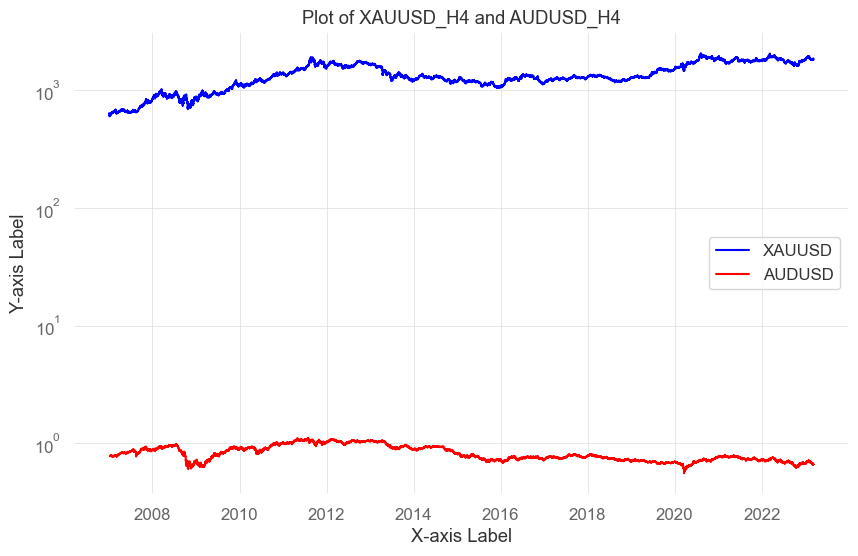

In [74]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [75]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [76]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          3.121e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:50:29   Log-Likelihood:                     -1.8854e+05
No. Observations:               25591   AIC:                                  3.771e+05
Df Residuals:                   25590   BIC:                                  3.771e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.3012      2.879    558.685      0.000    1602.659    1613.944
==============================================================================
Omnibus:                      929.957   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.211
Skew:                           0.341   Prob(JB):                    1.24e-163
Kurtosis:                       2.511   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
result = KF.Run()

In [78]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.915168
Multiple (Buy-and-Hold):     3.646865
--------------------------------------
Out-/Underperformance:       -2.731697


CAGR:                        -0.005529
Annualized Mean:             -0.005544
Annualized Std:              0.024847
Sharpe Ratio:                -0.223135
Sortino Ratio:               -0.307889
Maximum Drawdown:            0.135465
Calmar Ratio:                -0.040814
Max Drawdown Duration:       5840 Days
Kelly Criterion:             -8.482918


### Save Result Backtest 

In [79]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [80]:
filename = f'{Currency_Pair}_{TF}.csv'

In [81]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.01%
CAGR﹪                     -0.41%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.68%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -13.71%
Longest DD Days            5727
Volatility (ann.)          2.26%
Calmar                     -0.03
Skew                       -0.67
Kurtosis                   8.69

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.55%
Kelly Criterion            -1.89%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-13.711335,-13.289522
2,2007-03-14,2007-04-22,2007-06-25,104,-0.487085,-0.484586
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046131,-0.020920


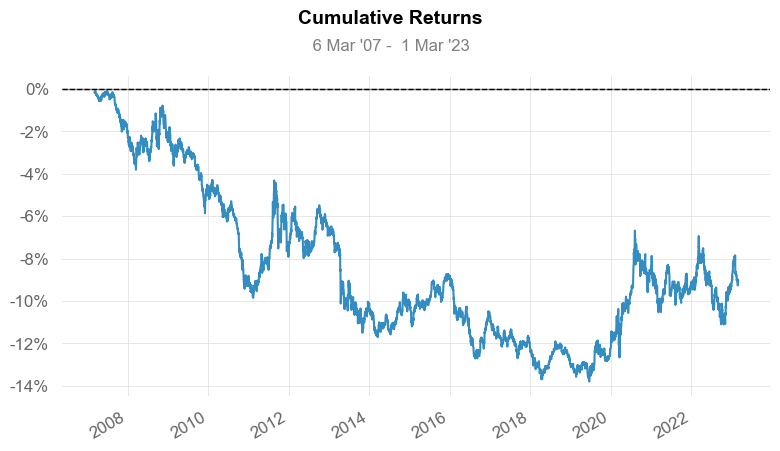

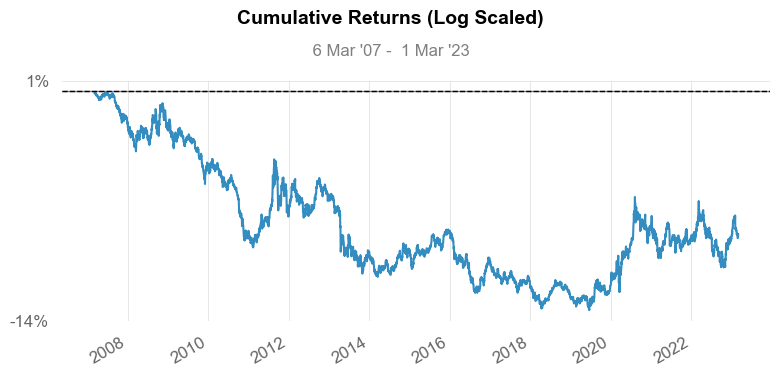

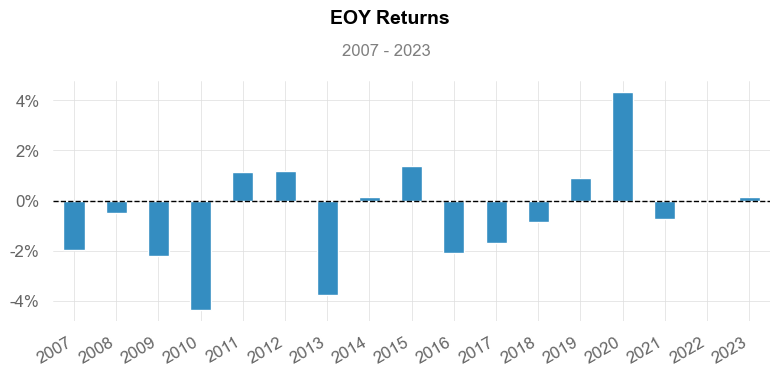

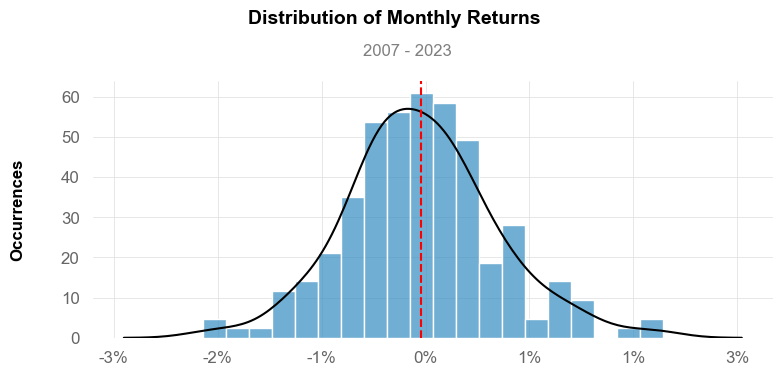

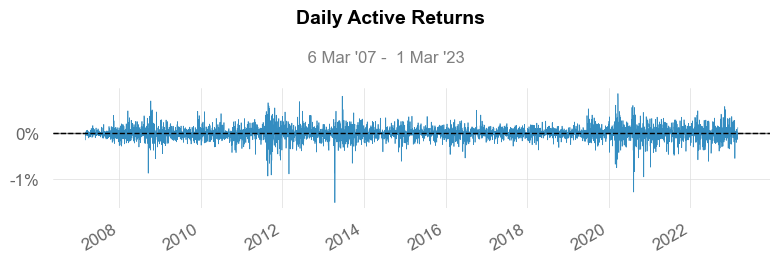

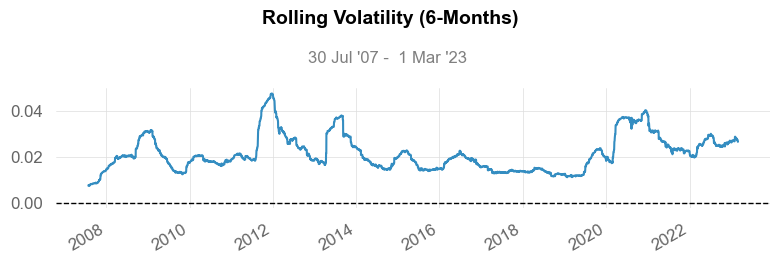

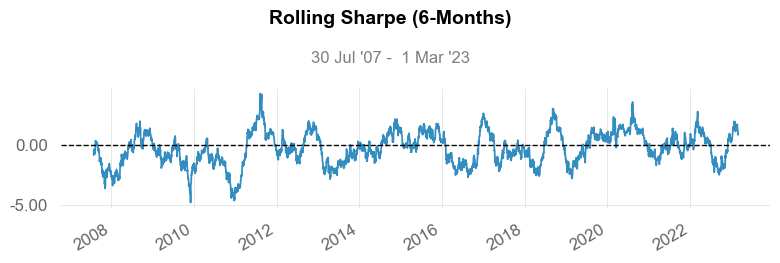

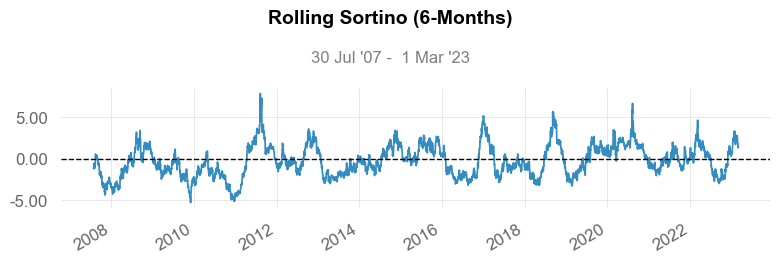

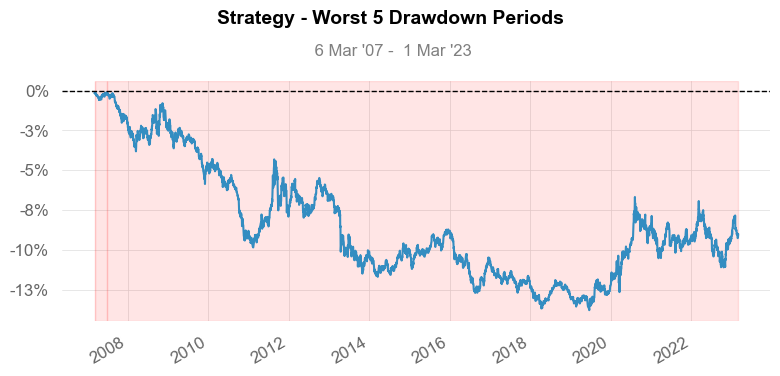

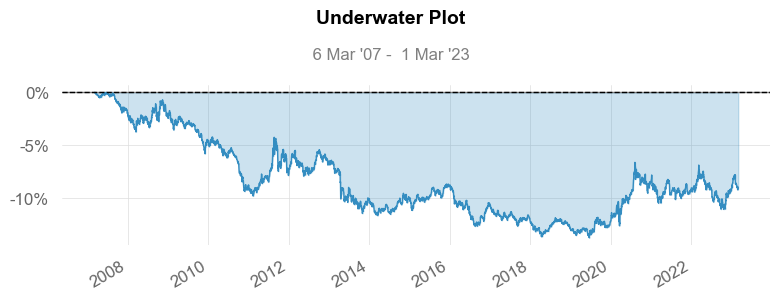

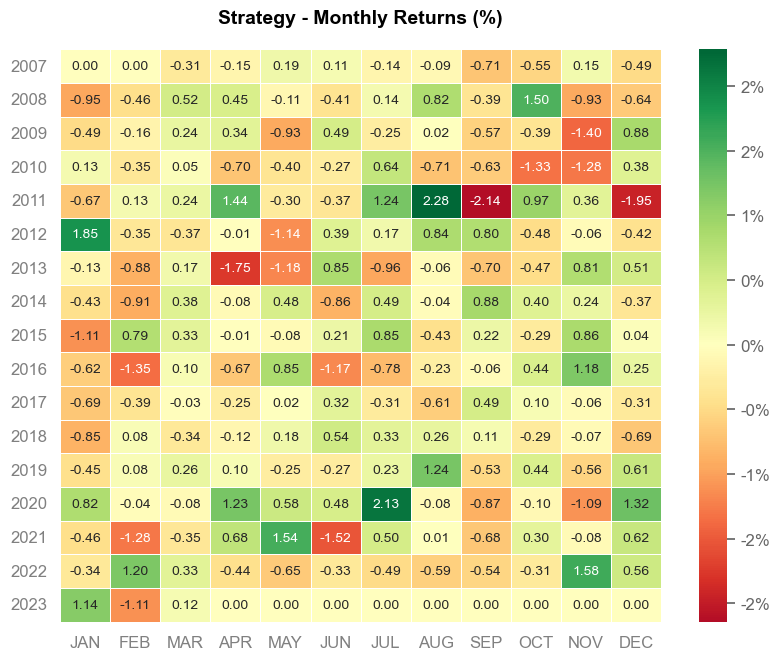

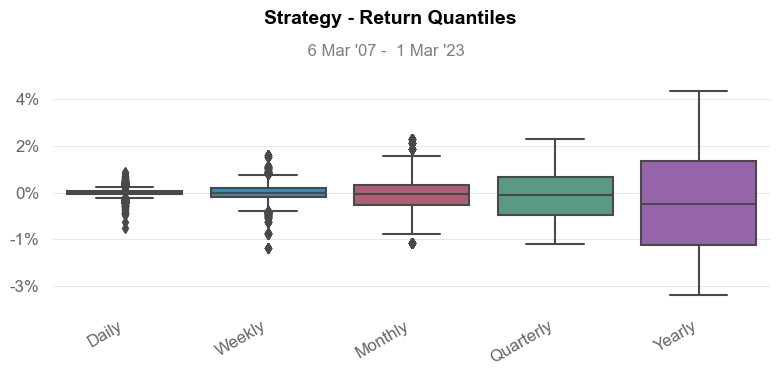

In [82]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [83]:
TF = 'H1'

In [84]:
data_1 = XAUUSD[TF]

In [85]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

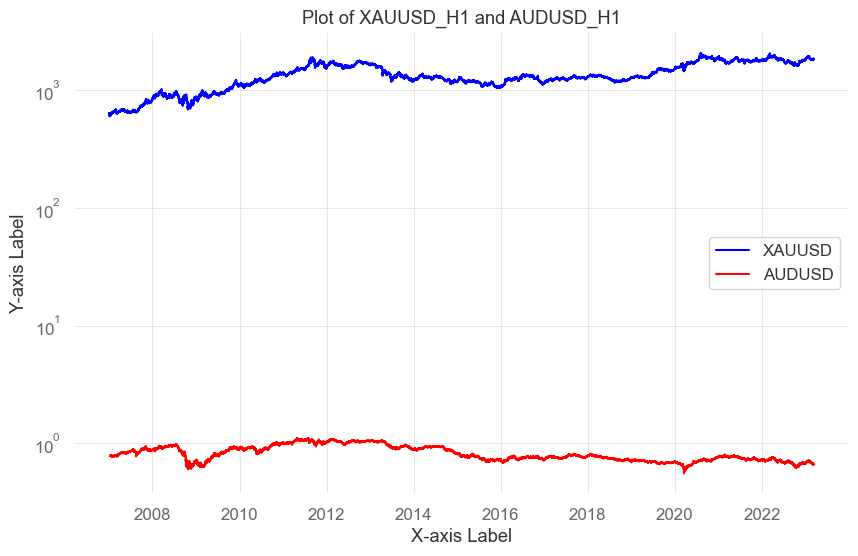

In [86]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [87]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [88]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          1.207e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        01:52:47   Log-Likelihood:                     -7.2907e+05
No. Observations:               98955   AIC:                                  1.458e+06
Df Residuals:                   98954   BIC:                                  1.458e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.4216      1.464   1098.456      0.000    1605.552    1611.292
==============================================================================
Omnibus:                     3606.618   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2901.361
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       2.510   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
result = KF.Run()

### Save Result Backtest 

In [90]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [91]:
filename = f'{Currency_Pair}_{TF}.csv'

In [92]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.42%
CAGR﹪                     -0.43%

Sharpe                     -0.21
Prob. Sharpe Ratio         17.59%
Smart Sharpe               -0.21
Sortino                    -0.28
Smart Sortino              -0.28
Sortino/√2                 -0.2
Smart Sortino/√2           -0.2
Omega                      0.96

Max Drawdown               -14.13%
Longest DD Days            5727
Volatility (ann.)          2.27%
Calmar                     -0.03
Skew                       -0.8
Kurtosis                   10.68

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.58%
Kelly Criterion            -1.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-14.125429,-13.680385
2,2007-03-14,2007-04-22,2007-06-25,104,-0.487007,-0.484508
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046124,-0.020917


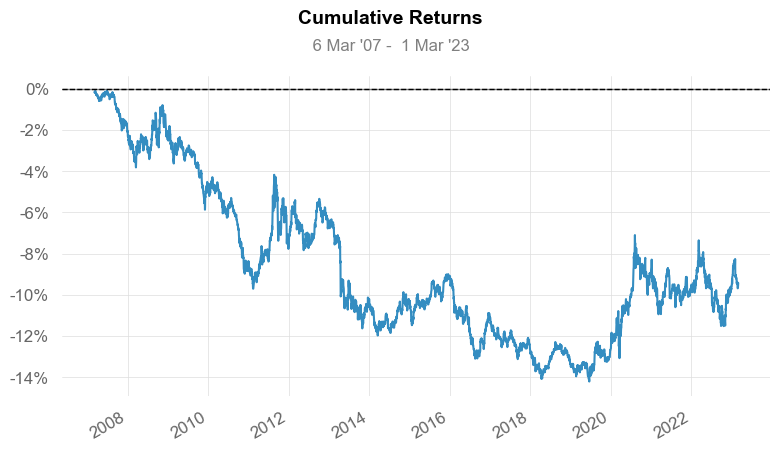

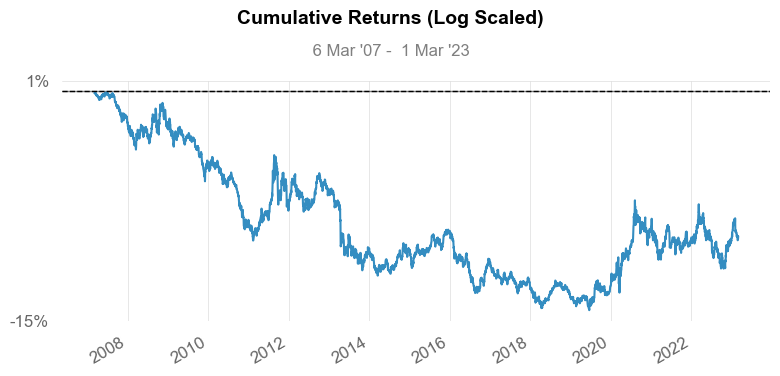

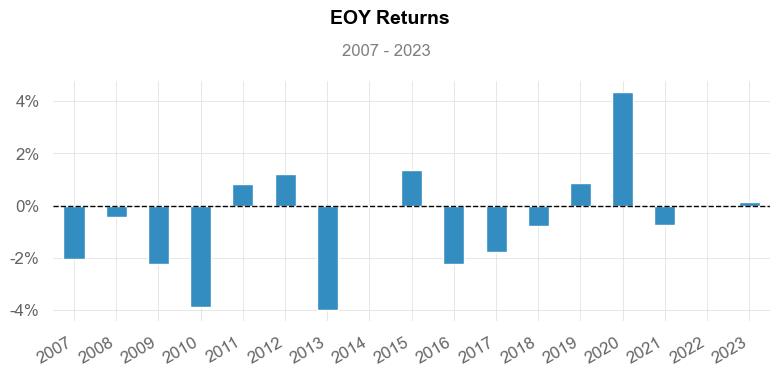

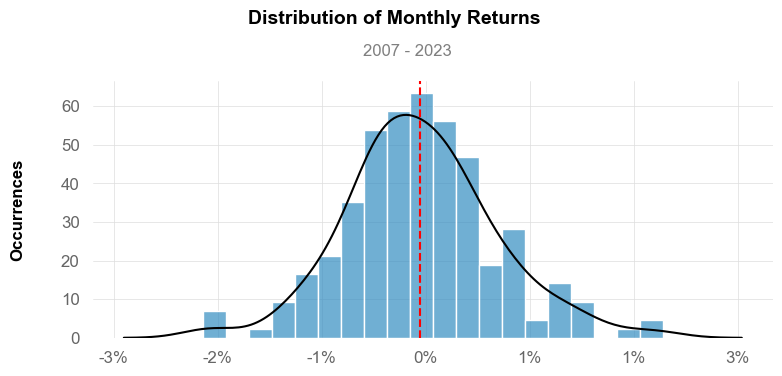

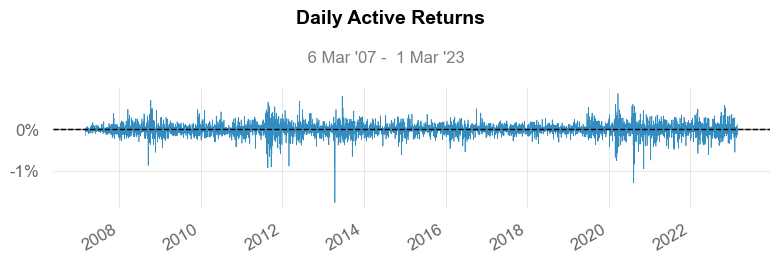

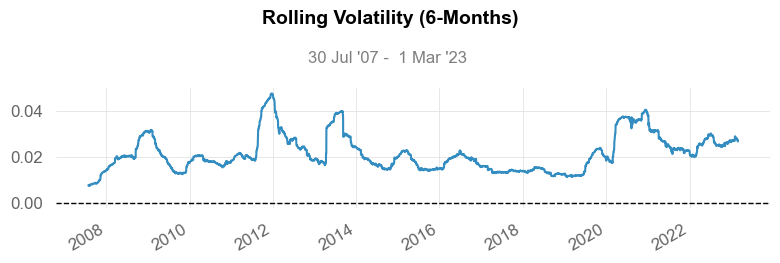

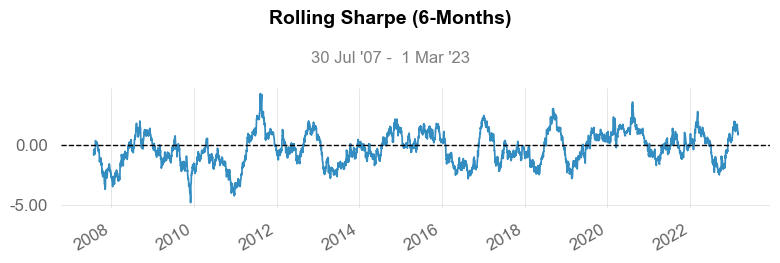

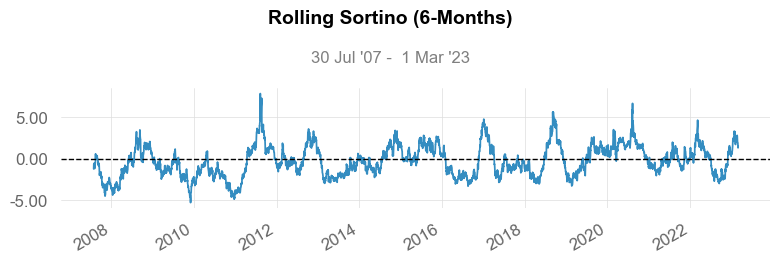

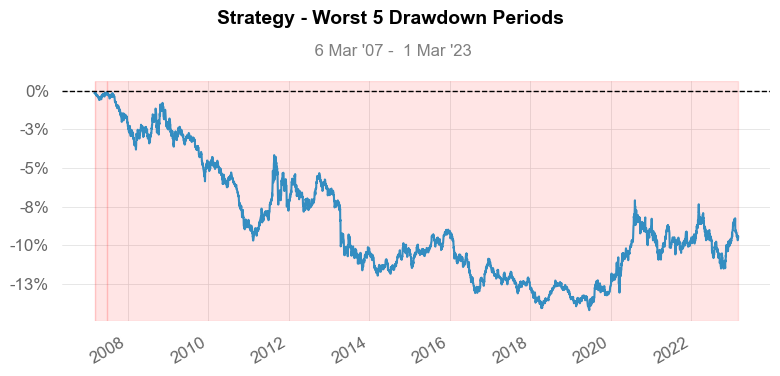

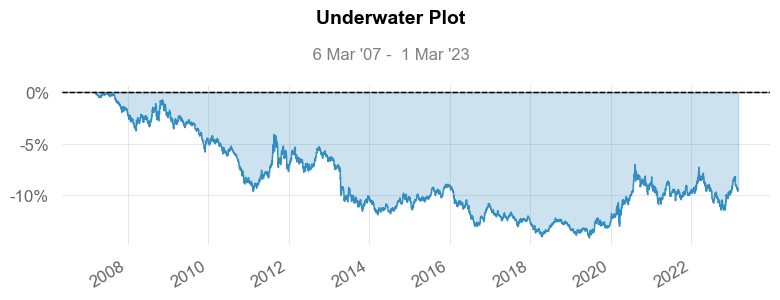

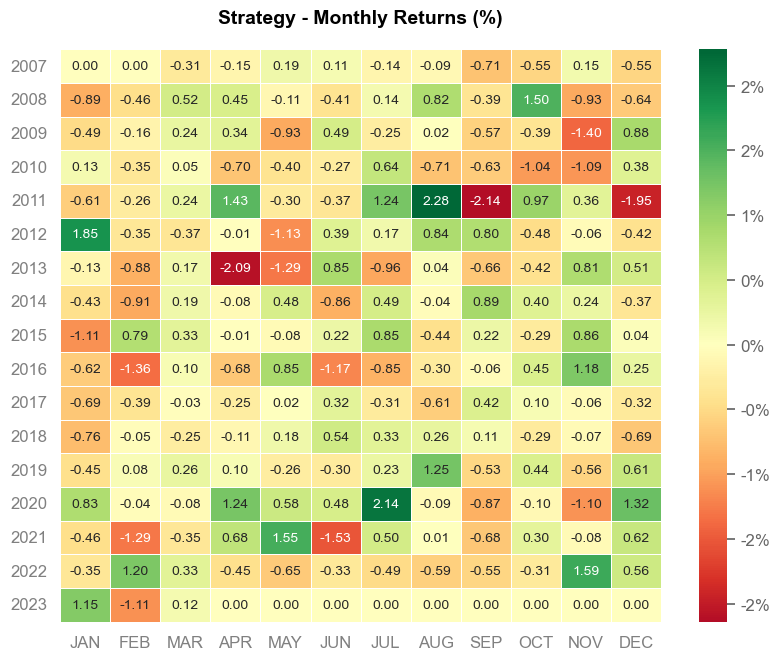

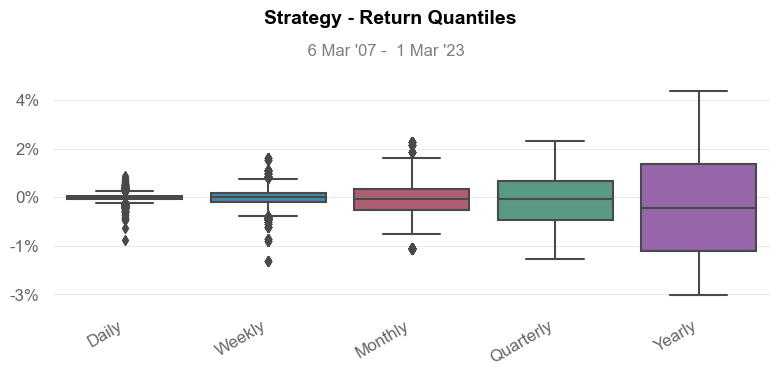

In [93]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [94]:
TF = 'M30'

In [95]:
data_1 = XAUUSD[TF]

In [96]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

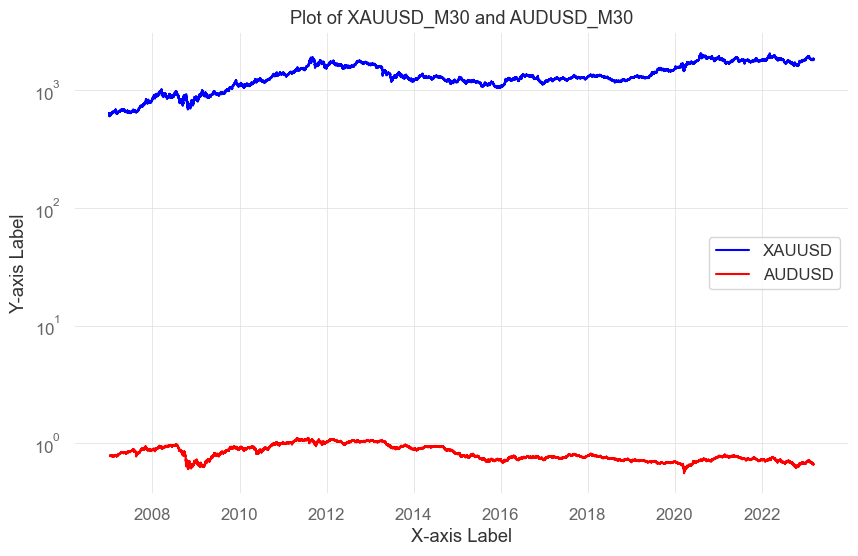

In [97]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [98]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [99]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          2.413e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        02:08:22   Log-Likelihood:                     -1.4573e+06
No. Observations:              197804   AIC:                                  2.915e+06
Df Residuals:                  197803   BIC:                                  2.915e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1608.6280      1.036   1553.304      0.000    1606.598    1610.658
==============================================================================
Omnibus:                     7204.475   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5792.797
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       2.510   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
result = KF.Run()

### Save Result Backtest 

In [101]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [102]:
filename = f'{Currency_Pair}_{TF}.csv'

In [103]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -9.09%
CAGR﹪                     -0.41%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.55%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -13.79%
Longest DD Days            5727
Volatility (ann.)          2.28%
Calmar                     -0.03
Skew                       -1.01
Kurtosis                   14.44

Expected Daily %           -0.0%
Expected Monthly %         -0.05%
Expected Yearly %          -0.56%
Kelly Criterion            -1.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.24%
Expected Shortfall (cVaR)  -0.24%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-27,2019-06-19,2023-03-01,5727,-13.791681,-13.319861
2,2007-03-14,2007-04-22,2007-06-25,104,-0.486925,-0.484426
3,2007-03-07,2007-03-08,2007-03-12,6,-0.046116,-0.020913


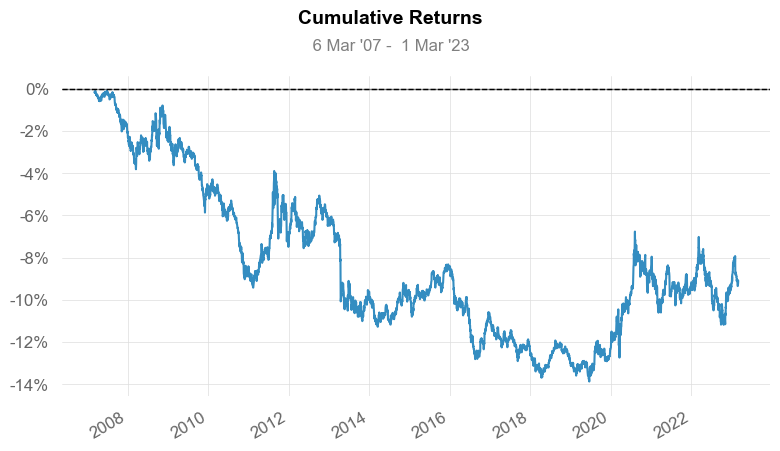

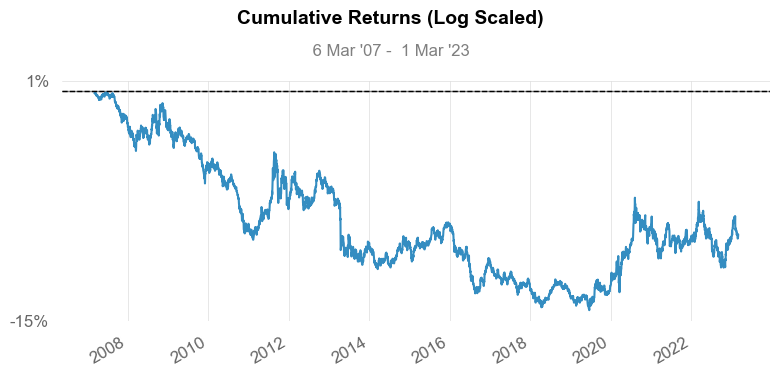

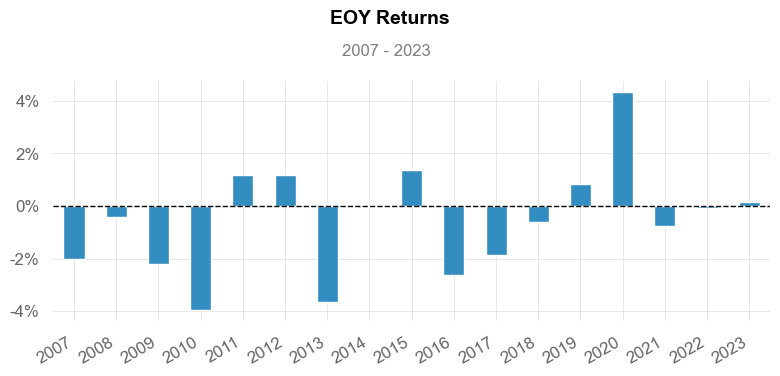

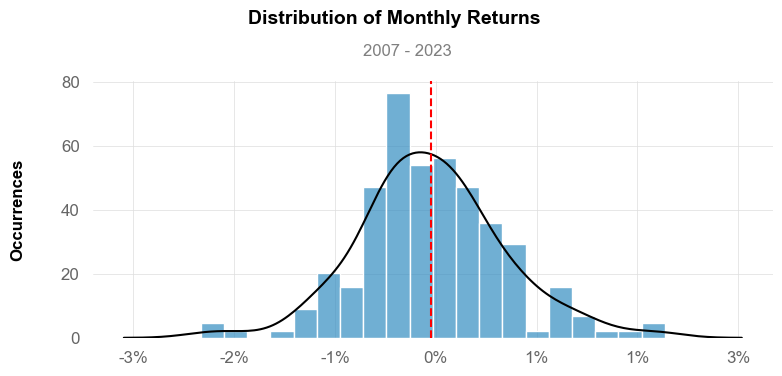

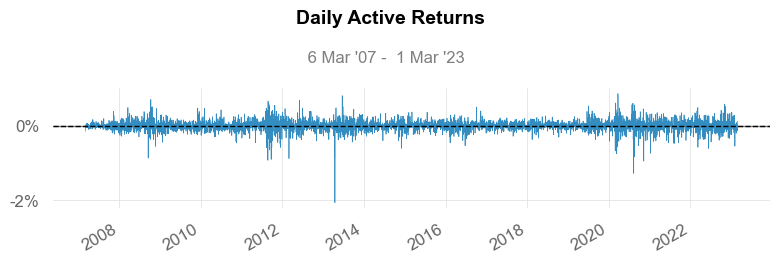

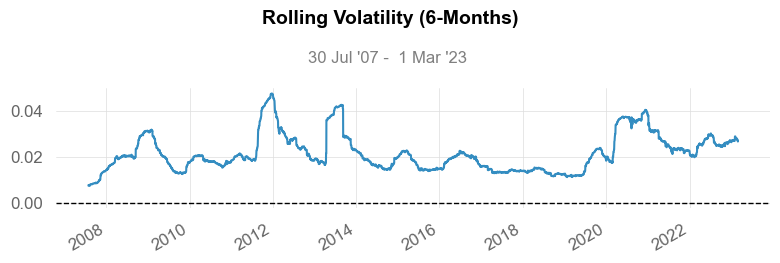

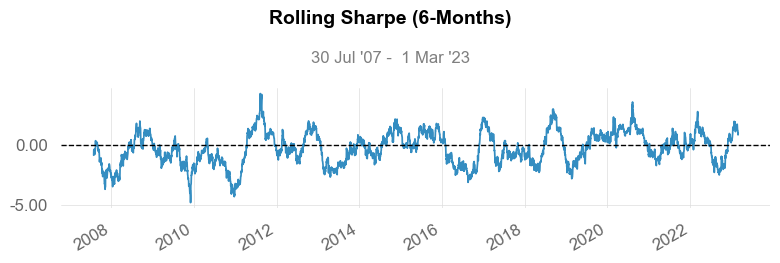

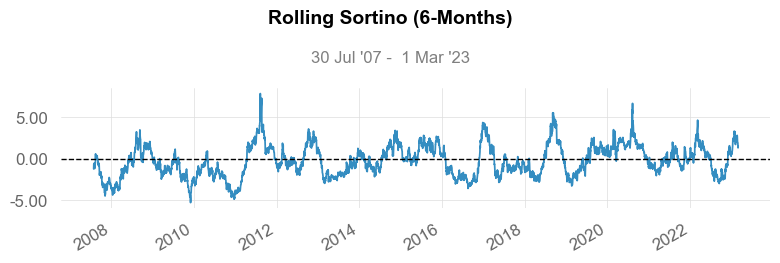

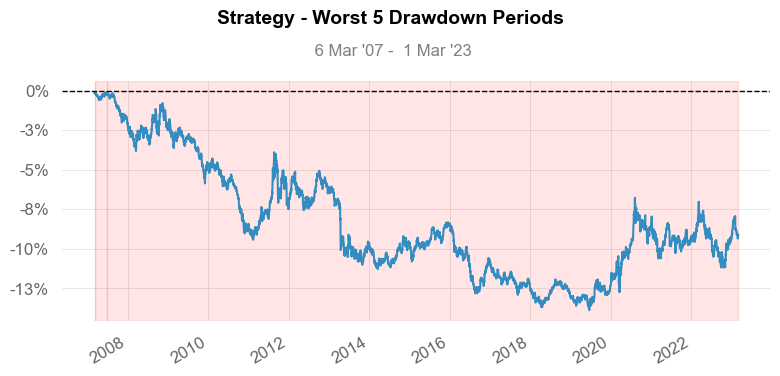

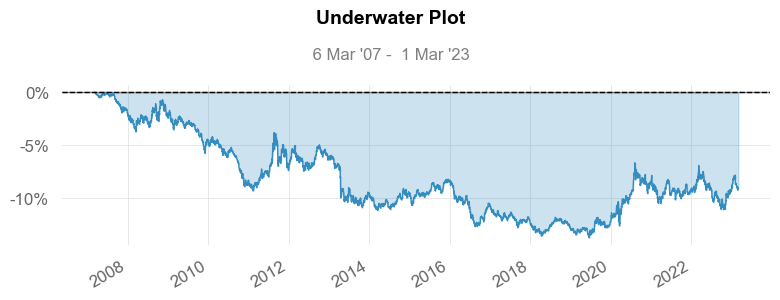

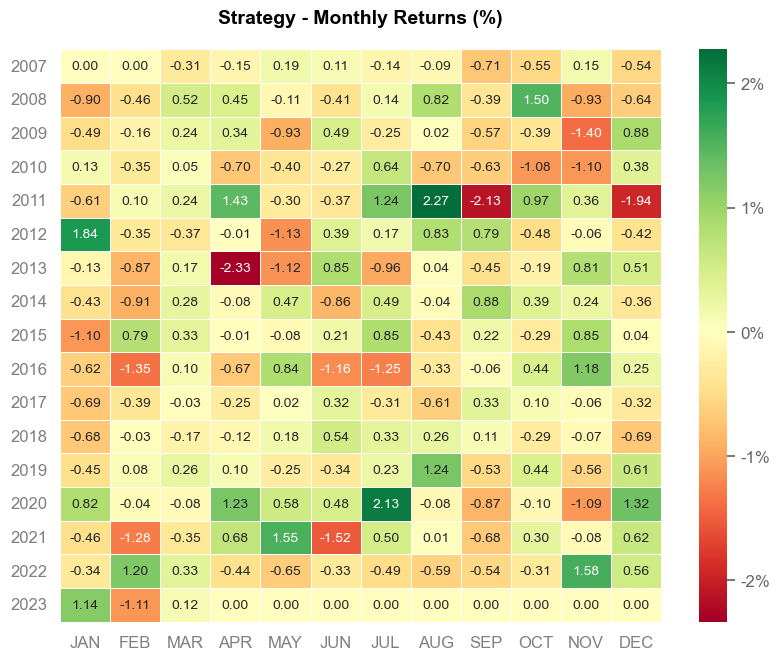

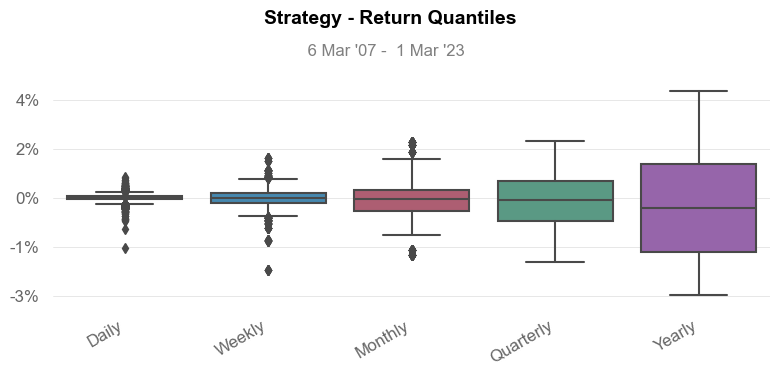

In [104]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())